In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree, X_train, X_test, y_train, y_test):

    poly_features = PolynomialFeatures(degree=degree)

    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)

    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)

    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    r2_test = r2_score(y_test, y_test_predict)
    
    slope = poly_model.coef_
    
    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))

    print("\n")

    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))
    
    print("\n")
    
    print("The slope is {}".format(slope[0][1]))

In [3]:
def statistics(degree, X_train, X_test, y_train, y_test):

    poly_features = PolynomialFeatures(degree=degree)

    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)

    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)

    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    r2_test = r2_score(y_test, y_test_predict)
    
    slope = poly_model.coef_
    
    return [slope[0][1], rmse_train, r2_train, rmse_test, r2_test]

In [4]:
def display_regression_plot(data):
    sns.pairplot(data, kind = 'reg', size = 10, x_vars = ['UnitPrice'], y_vars = ['Quantity'])
    plt.show()

In [5]:
data = pd.read_csv('data.csv', encoding = 'ISO-8859-1')

In [6]:
# Remove noise data from quantity & UnitPrice 
data = data[(data['Quantity']> 0) & (data['UnitPrice'] > 0)]

In [7]:
#Remove Outlier
from scipy import stats
data = data[(np.abs(stats.zscore(data['Quantity'])) < 3)]

In [8]:
chosen = ['23166', '85099B', '85123A', '23084', '22197']
newDict = {
        'Item': [],
        'Price Elasticity of Demand':[]
    }

newDict2 = {
        'Item': [],
        'R Squared Value':[]
    }

In [9]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# MEDIUM CERAMIC TOP STORAGE JAR

In [10]:
data_selected = data[data['StockCode'] == chosen[0]]

In [11]:
data_selected

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
186770,552882,23166,MEDIUM CERAMIC TOP STORAGE JAR,96,5/12/2011 10:10,1.04,14646.0,Netherlands
187196,552953,23166,MEDIUM CERAMIC TOP STORAGE JAR,4,5/12/2011 12:11,1.25,16745.0,United Kingdom
187718,553005,23166,MEDIUM CERAMIC TOP STORAGE JAR,5,5/12/2011 16:29,1.25,14651.0,United Kingdom
187868,553009,23166,MEDIUM CERAMIC TOP STORAGE JAR,3,5/12/2011 16:52,1.25,13601.0,United Kingdom
188644,553052,23166,MEDIUM CERAMIC TOP STORAGE JAR,48,5/13/2011 10:14,1.04,15251.0,United Kingdom
...,...,...,...,...,...,...,...,...
533742,581108,23166,MEDIUM CERAMIC TOP STORAGE JAR,2,12/7/2011 12:16,1.25,15984.0,United Kingdom
536248,581219,23166,MEDIUM CERAMIC TOP STORAGE JAR,1,12/8/2011 9:28,2.46,NaN,United Kingdom
539776,581439,23166,MEDIUM CERAMIC TOP STORAGE JAR,2,12/8/2011 16:30,2.46,NaN,United Kingdom
540301,581476,23166,MEDIUM CERAMIC TOP STORAGE JAR,48,12/9/2011 8:48,1.04,12433.0,Norway


In [12]:
data_selected.skew()

InvoiceNo     0.263600
StockCode     0.000000
Quantity      5.574013
UnitPrice     1.435880
CustomerID    0.064892
dtype: float64

In [13]:
#Transform Skewed Columns
data_selected['Quantity'] = np.log(data_selected['Quantity'])
data_selected['UnitPrice'] = np.log(data_selected['UnitPrice'])

C:\Users\ernes\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ernes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
data_selected.skew()

InvoiceNo     0.263600
StockCode     0.000000
Quantity      0.302086
UnitPrice     1.341458
CustomerID    0.064892
dtype: float64

In [15]:
data_selected = data_selected[['Quantity','UnitPrice']]

In [16]:
#Standardisation of Scales
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_selected)
scaler.fit_transform(data_selected)
data_scaled= scaler.transform(data_selected)
data_prepared=pd.DataFrame(data_scaled, columns=data_selected.columns)

In [17]:
data_prepared.head()

,Quantity,UnitPrice
0,2.128068,-1.045797
1,-0.381673,-0.404487
2,-0.205454,-0.404487
3,-0.608858,-0.404487
4,1.580683,-1.045797


In [18]:
from sklearn.model_selection import train_test_split

X = data_prepared[['UnitPrice']]
y = data_prepared[['Quantity']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((149, 1), (149, 1), (100, 1), (100, 1))

In [19]:
create_polynomial_regression_model(2, X_train, X_test, y_train, y_test)

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.6085743096190056
R2 score of training set is 0.6207902229978977


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.7652807060977984
R2 score of test set is 0.42878962112928265


The slope is -1.6490974815666486


C:\Users\ernes\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


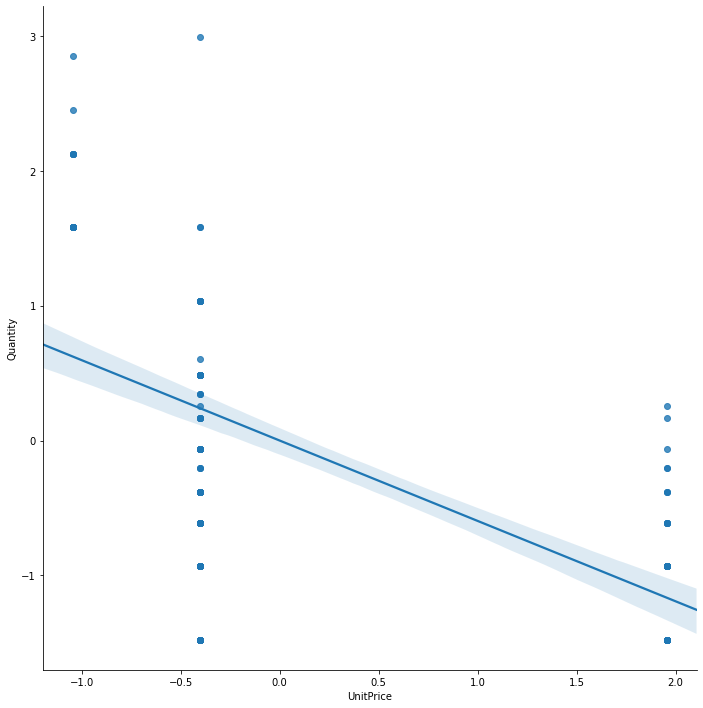

In [20]:
display_regression_plot(data_prepared)

In [21]:
import statsmodels.api as sm

mod = sm.OLS(y_train, X_train)

m1 = mod.fit()

p_values = m1.summary2().tables[1]['P>|t|']

round(p_values, 4)

UnitPrice    0.0
Name: P>|t|, dtype: float64

In [22]:
stats = statistics(2, X_train, X_test, y_train, y_test)
slope = stats[0]

mean_price = np.mean(data[data['StockCode'] == chosen[0]]['UnitPrice'])
mean_quantity = np.mean(data[data['StockCode'] == chosen[0]]['Quantity'])
price_elasticity = abs((slope) * (mean_price/mean_quantity))
print("The price elasticity of demand is", price_elasticity)
newDict['Item'].append('MEDIUM CERAMIC TOP STORAGE JAR')
newDict['Price Elasticity of Demand'].append(price_elasticity)
newDict2['Item'].append('MEDIUM CERAMIC TOP STORAGE JAR')
newDict2['R Squared Value'].append(stats[-1])

The price elasticity of demand is 0.15811985491145059


# JUMBO BAG RED RETROSPOT

In [23]:
data_selected = data[data['StockCode'] == chosen[1]]

In [24]:
data_selected.skew()

InvoiceNo     0.008037
Quantity      4.322838
UnitPrice     1.281189
CustomerID    0.049171
dtype: float64

In [25]:
#Transform Skewed Columns
data_selected['Quantity'] = np.log(data_selected['Quantity'])
data_selected['UnitPrice'] = np.log(data_selected['UnitPrice'])

C:\Users\ernes\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ernes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
data_selected.skew()

InvoiceNo     0.008037
Quantity      0.422002
UnitPrice     1.205785
CustomerID    0.049171
dtype: float64

In [27]:
data_selected = data_selected[['Quantity','UnitPrice']]

In [28]:
#Standardisation of Scales
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_selected)
scaler.fit_transform(data_selected)
data_scaled= scaler.transform(data_selected)
data_prepared=pd.DataFrame(data_scaled, columns=data_selected.columns)

In [29]:
data_prepared.head()

,Quantity,UnitPrice
0,1.910295,-1.169693
1,1.910295,-1.169693
2,-1.024780,-0.623655
3,-1.544828,-0.623655
4,-1.544828,-0.623655


In [30]:
from sklearn.model_selection import train_test_split

X = data_prepared[['UnitPrice']]
y = data_prepared[['Quantity']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1687, 1), (1687, 1), (422, 1), (422, 1))

In [31]:
create_polynomial_regression_model(2, X_train, X_test, y_train, y_test)

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.7143332608975557
R2 score of training set is 0.4846739312922701


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.7227446268951345
R2 score of test set is 0.4973355595899014


The slope is -1.6578037602135807


C:\Users\ernes\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


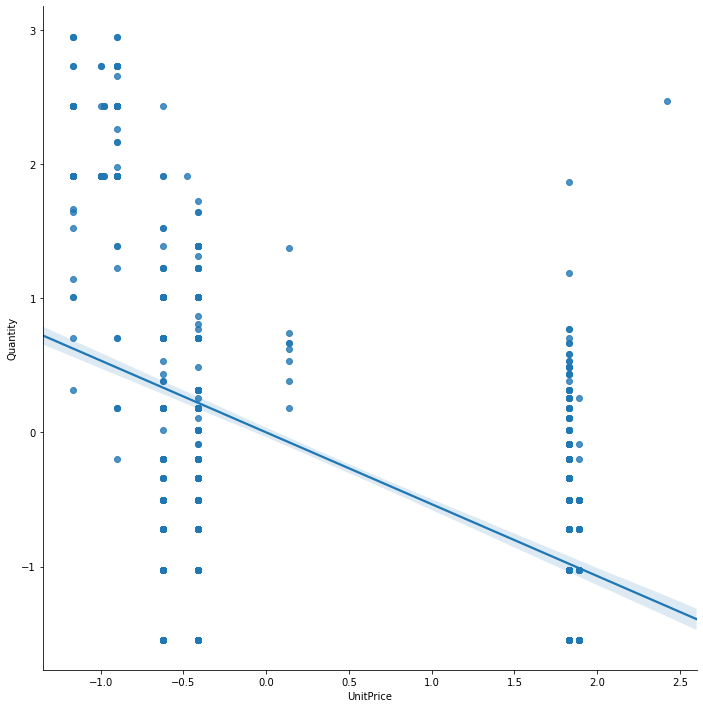

In [32]:
display_regression_plot(data_prepared)

In [33]:
import statsmodels.api as sm

mod = sm.OLS(y_train, X_train)

m1 = mod.fit()

p_values = m1.summary2().tables[1]['P>|t|']

round(p_values, 4)

UnitPrice    0.0
Name: P>|t|, dtype: float64

In [34]:
stats = statistics(2, X_train, X_test, y_train, y_test)
slope = stats[0]

mean_price = np.mean(data[data['StockCode'] == chosen[1]]['UnitPrice'])
mean_quantity = np.mean(data[data['StockCode'] == chosen[1]]['Quantity'])
price_elasticity = abs((slope) * (mean_price/mean_quantity))
print("The price elasticity of demand is", price_elasticity)
newDict['Item'].append('JUMBO BAG RED RETROSPOT')
newDict['Price Elasticity of Demand'].append(price_elasticity)
newDict2['Item'].append('JUMBO BAG RED RETROSPOT')
newDict2['R Squared Value'].append(stats[-1])

The price elasticity of demand is 0.19202240550394406


# WHITE HANGING HEART T-LIGHT HOLDER

In [35]:
data_selected = data[data['StockCode'] == chosen[2]]

In [36]:
data_selected.skew()

InvoiceNo     0.238126
Quantity      6.811820
UnitPrice     2.897210
CustomerID   -0.006740
dtype: float64

In [37]:
#Transform Skewed Columns
data_selected['Quantity'] = np.log(data_selected['Quantity'])
data_selected['UnitPrice'] = np.log(data_selected['UnitPrice'])

C:\Users\ernes\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ernes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
data_selected.skew()

InvoiceNo     0.238126
Quantity      0.411434
UnitPrice     2.664950
CustomerID   -0.006740
dtype: float64

In [39]:
data_selected = data_selected[['Quantity','UnitPrice']]

In [40]:
#Standardisation of Scales
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_selected)
scaler.fit_transform(data_selected)
data_scaled= scaler.transform(data_selected)
data_prepared=pd.DataFrame(data_scaled, columns=data_selected.columns)

In [41]:
data_prepared.head()

,Quantity,UnitPrice
0,-0.045671,-0.8951
1,-0.045671,-0.8951
2,-0.045671,-0.8951
3,2.043272,-0.8951
4,1.431582,-0.8951


In [42]:
from sklearn.model_selection import train_test_split

X = data_prepared[['UnitPrice']]
y = data_prepared[['Quantity']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1805, 1), (1805, 1), (452, 1), (452, 1))

In [43]:
create_polynomial_regression_model(2, X_train, X_test, y_train, y_test)

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.6905867628613993
R2 score of training set is 0.5175279902346743


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.7130973806278514
R2 score of test set is 0.5098849305914792


The slope is -1.8551639647026759


C:\Users\ernes\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


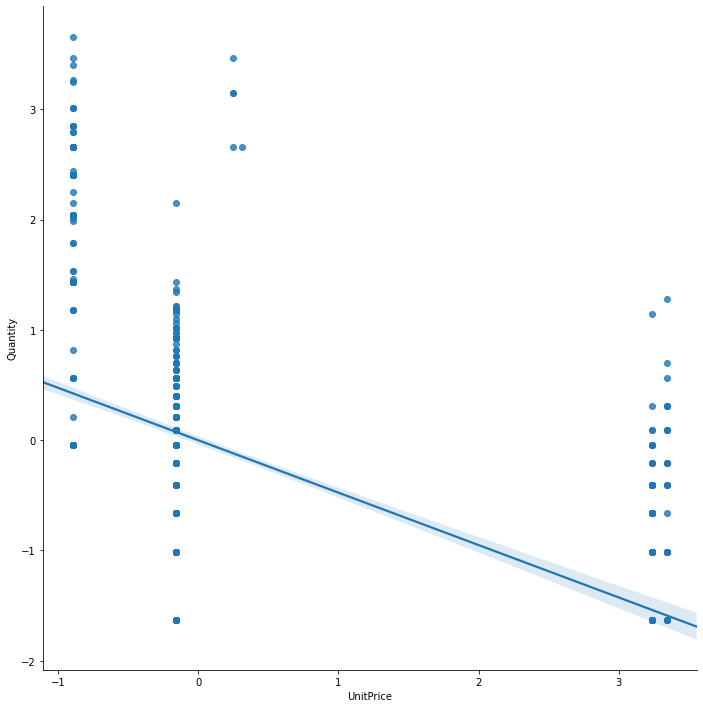

In [44]:
display_regression_plot(data_prepared)

In [45]:
import statsmodels.api as sm

mod = sm.OLS(y_train, X_train)

m1 = mod.fit()

p_values = m1.summary2().tables[1]['P>|t|']

round(p_values, 4)

UnitPrice    0.0
Name: P>|t|, dtype: float64

In [46]:
stats = statistics(2, X_train, X_test, y_train, y_test)
slope = stats[0]

mean_price = np.mean(data[data['StockCode'] == chosen[2]]['UnitPrice'])
mean_quantity = np.mean(data[data['StockCode'] == chosen[2]]['Quantity'])
price_elasticity = abs((slope) * (mean_price/mean_quantity))
print("The price elasticity of demand is", price_elasticity)
newDict['Item'].append('WHITE HANGING HEART T-LIGHT HOLDER')
newDict['Price Elasticity of Demand'].append(price_elasticity)
newDict2['Item'].append('WHITE HANGING HEART T-LIGHT HOLDER')
newDict2['R Squared Value'].append(stats[-1])

The price elasticity of demand is 0.43957978336908965


# RABBIT NIGHT LIGHT

In [47]:
data_selected = data[data['StockCode'] == chosen[3]]

In [48]:
data_selected.skew()

InvoiceNo    -0.901000
StockCode     0.000000
Quantity      5.072211
UnitPrice     1.697333
CustomerID    0.213979
dtype: float64

In [49]:
#Transform Skewed Columns
data_selected['Quantity'] = np.log(data_selected['Quantity'])
data_selected['UnitPrice'] = np.log(data_selected['UnitPrice'])

C:\Users\ernes\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ernes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
data_selected.skew()

InvoiceNo    -0.901000
StockCode     0.000000
Quantity      0.190920
UnitPrice     1.550198
CustomerID    0.213979
dtype: float64

In [51]:
data_selected = data_selected[['Quantity','UnitPrice']]

In [52]:
#Standardisation of Scales
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_selected)
scaler.fit_transform(data_selected)
data_scaled= scaler.transform(data_selected)
data_prepared=pd.DataFrame(data_scaled, columns=data_selected.columns)

In [53]:
data_prepared.head()

,Quantity,UnitPrice
0,-1.020252,-0.295501
1,-0.214265,-0.295501
2,0.802776,-0.809926
3,-1.528772,-0.295501
4,0.966483,-0.809926


In [54]:
from sklearn.model_selection import train_test_split

X = data_prepared[['UnitPrice']]
y = data_prepared[['Quantity']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((822, 1), (822, 1), (206, 1), (206, 1))

In [55]:
create_polynomial_regression_model(2, X_train, X_test, y_train, y_test)

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.7243141640258703
R2 score of training set is 0.4865784233424776


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.6983068278256774
R2 score of test set is 0.46384045281071407


The slope is -1.8806297578173647


C:\Users\ernes\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


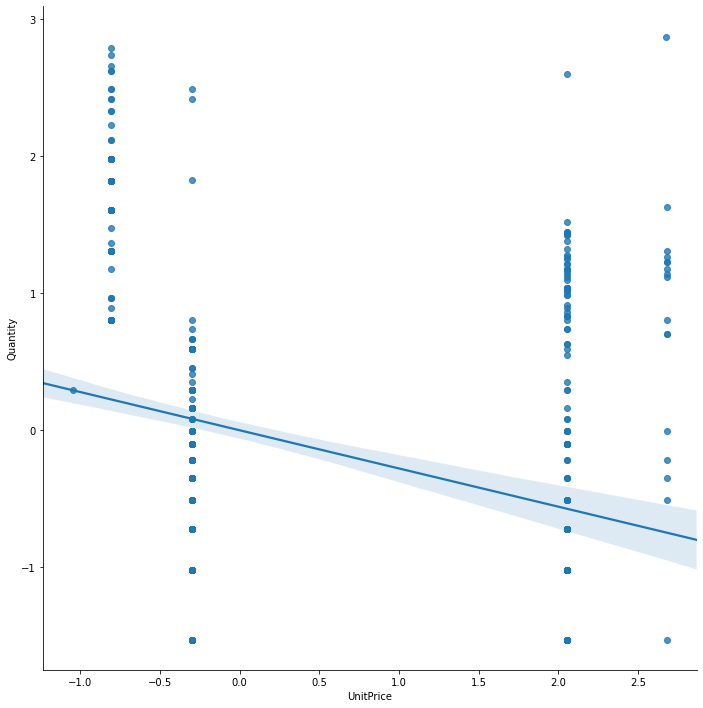

In [56]:
display_regression_plot(data_prepared)

In [57]:
import statsmodels.api as sm

mod = sm.OLS(y_train, X_train)

m1 = mod.fit()

p_values = m1.summary2().tables[1]['P>|t|']

round(p_values, 4)

UnitPrice    0.0
Name: P>|t|, dtype: float64

In [58]:
stats = statistics(2, X_train, X_test, y_train, y_test)
slope = stats[0]

mean_price = np.mean(data[data['StockCode'] == chosen[3]]['UnitPrice'])
mean_quantity = np.mean(data[data['StockCode'] == chosen[3]]['Quantity'])
price_elasticity = abs((slope) * (mean_price/mean_quantity))
print("The price elasticity of demand is", price_elasticity)
newDict['Item'].append('RABBIT NIGHT LIGHT')
newDict['Price Elasticity of Demand'].append(price_elasticity)
newDict2['Item'].append('RABBIT NIGHT LIGHT')
newDict2['R Squared Value'].append(stats[-1])

The price elasticity of demand is 0.2195748252242916


# SMALL POPCORN HOLDER

In [59]:
data_selected = data[data['StockCode'] == chosen[4]]

In [60]:
data_selected.skew()

InvoiceNo    -0.116108
StockCode     0.000000
Quantity      4.449833
UnitPrice     1.519944
CustomerID   -0.019681
dtype: float64

In [61]:
#Transform Skewed Columns
data_selected['Quantity'] = np.log(data_selected['Quantity'])
data_selected['UnitPrice'] = np.log(data_selected['UnitPrice'])

C:\Users\ernes\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ernes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
data_selected.skew()

InvoiceNo    -0.116108
StockCode     0.000000
Quantity      0.197698
UnitPrice     1.212079
CustomerID   -0.019681
dtype: float64

In [63]:
data_selected = data_selected[['Quantity','UnitPrice']]

In [64]:
#Standardisation of Scales
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_selected)
scaler.fit_transform(data_selected)
data_scaled= scaler.transform(data_selected)
data_prepared=pd.DataFrame(data_scaled, columns=data_selected.columns)

In [65]:
data_prepared.head()

,Quantity,UnitPrice
0,1.766081,-1.020839
1,0.960472,-0.487428
2,-1.318690,-0.487428
3,-0.596162,-0.487428
4,-0.596162,-0.487428


In [66]:
from sklearn.model_selection import train_test_split

X = data_prepared[['UnitPrice']]
y = data_prepared[['Quantity']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1124, 1), (1124, 1), (282, 1), (282, 1))

In [67]:
create_polynomial_regression_model(2, X_train, X_test, y_train, y_test)

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.7887823148642518
R2 score of training set is 0.36141409189517437


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.821187164996661
R2 score of test set is 0.38791189084873756


The slope is -1.225711724004037


C:\Users\ernes\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


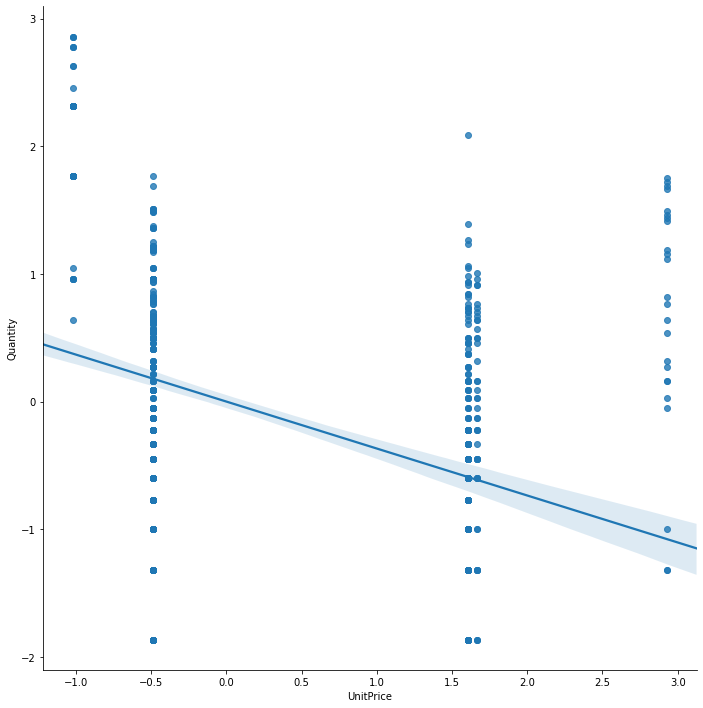

In [68]:
display_regression_plot(data_prepared)

In [69]:
import statsmodels.api as sm

mod = sm.OLS(y_train, X_train)

m1 = mod.fit()

p_values = m1.summary2().tables[1]['P>|t|']

round(p_values, 4)

UnitPrice    0.0
Name: P>|t|, dtype: float64

In [70]:
stats = statistics(2, X_train, X_test, y_train, y_test)
slope = stats[0]

mean_price = np.mean(data[data['StockCode'] == chosen[4]]['UnitPrice'])
mean_quantity = np.mean(data[data['StockCode'] == chosen[4]]['Quantity'])
price_elasticity = abs((slope) * (mean_price/mean_quantity))
print("The price elasticity of demand is", price_elasticity)
newDict['Item'].append('SMALL POPCORN HOLDER')
newDict['Price Elasticity of Demand'].append(price_elasticity)
newDict2['Item'].append('SMALL POPCORN HOLDER')
newDict2['R Squared Value'].append(stats[-1])

The price elasticity of demand is 0.05268780795469231


<BarContainer object of 5 artists>

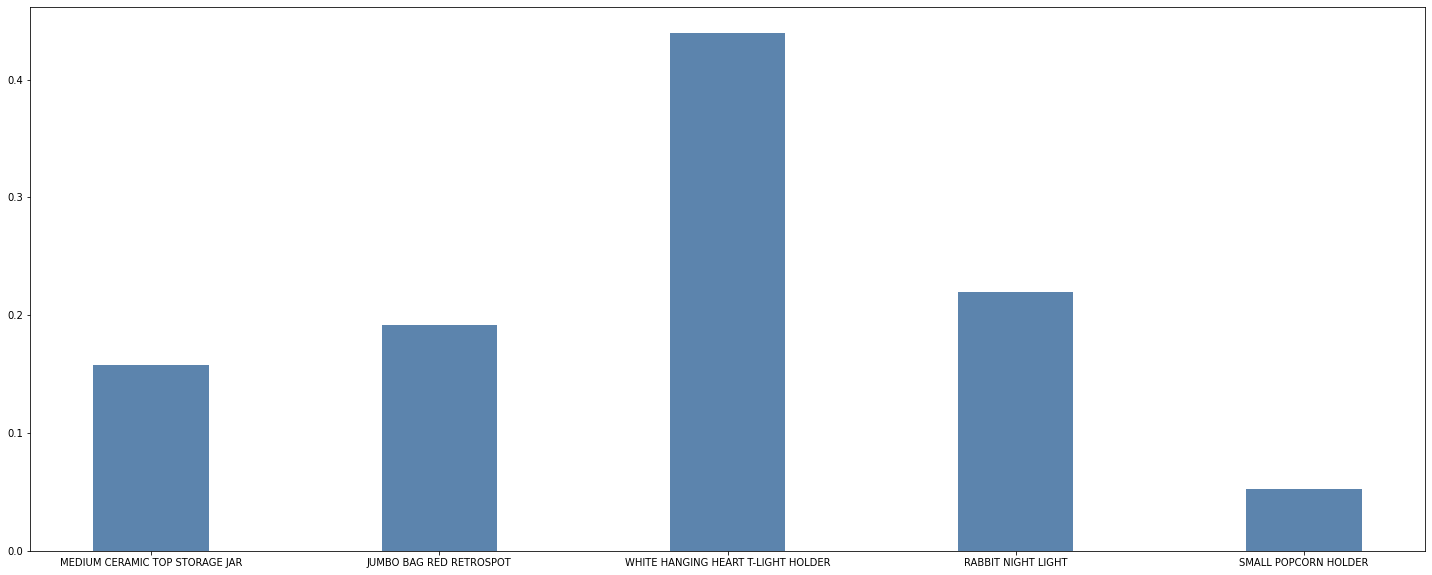

In [71]:
ped_df = pd.DataFrame(newDict)
plt.figure(figsize=(25, 10))
plt.bar(ped_df['Item'], ped_df['Price Elasticity of Demand'], color=(0.2, 0.4, 0.6, 0.8),  width = 0.4) 

In [72]:
ped_df

,Item,Price Elasticity of Demand
0,MEDIUM CERAMIC TOP STORAGE JAR,0.158120
1,JUMBO BAG RED RETROSPOT,0.192022
2,WHITE HANGING HEART T-LIGHT HOLDER,0.439580
3,RABBIT NIGHT LIGHT,0.219575
4,SMALL POPCORN HOLDER,0.052688


<BarContainer object of 5 artists>

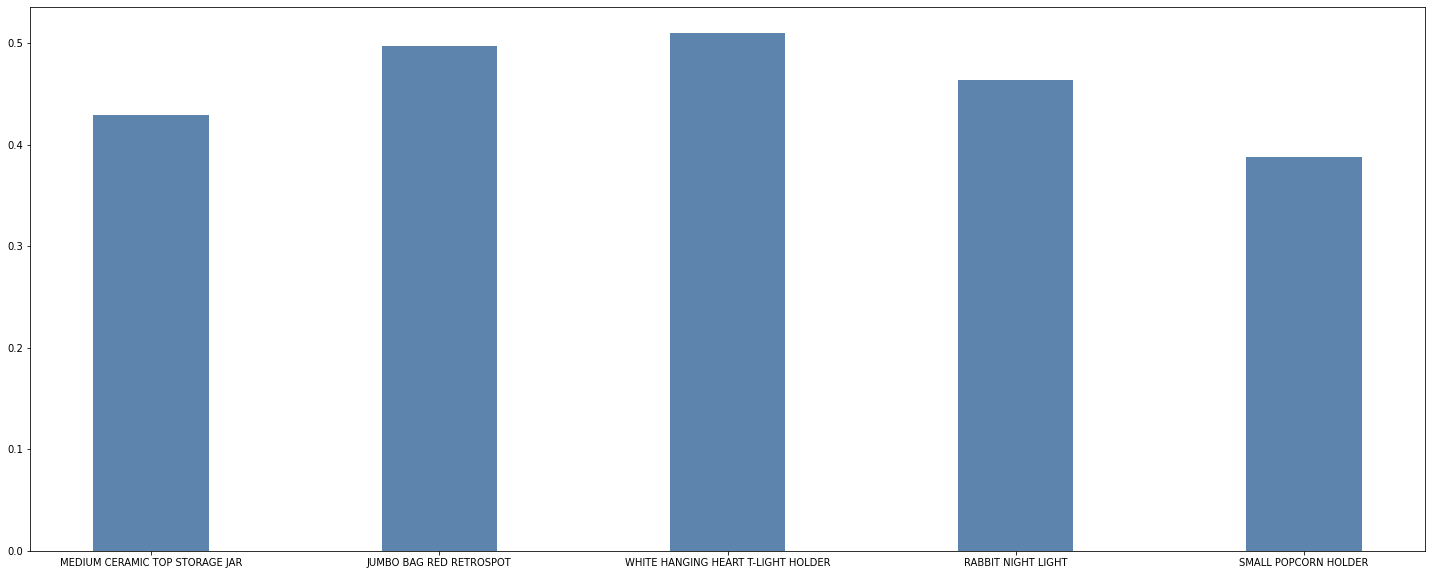

In [73]:
r2_df = pd.DataFrame(newDict2)
plt.figure(figsize=(25, 10))
plt.bar(ped_df['Item'], r2_df['R Squared Value'], color=(0.2, 0.4, 0.6, 0.8),  width = 0.4) 

In [74]:
r2_df

,Item,R Squared Value
0,MEDIUM CERAMIC TOP STORAGE JAR,0.428790
1,JUMBO BAG RED RETROSPOT,0.497336
2,WHITE HANGING HEART T-LIGHT HOLDER,0.509885
3,RABBIT NIGHT LIGHT,0.463840
4,SMALL POPCORN HOLDER,0.387912
